### Baseline Models
**Classical ML**
- **Regression**:  Random Forest for case count prediction.


In [66]:
#importing necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

In [67]:
# Loading  the movies dataset
data = pd.read_csv('final_modeling_dataset.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 349 entries, 0 to 348
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   periodname              349 non-null    object 
 1   week_start              349 non-null    object 
 2   week_end                349 non-null    object 
 3   Combined_positive       349 non-null    float64
 4   temp_c                  349 non-null    float64
 5   rh_pct                  349 non-null    float64
 6   rain_mm                 349 non-null    float64
 7   wind10_kmh              349 non-null    float64
 8   soil_moisture_top_m3m3  349 non-null    float64
dtypes: float64(6), object(3)
memory usage: 24.7+ KB


In [68]:
data.head

<bound method NDFrame.head of                           periodname  week_start    week_end  \
0     Week 1 2018-12-31 - 2019-01-06  2018-12-31  2019-01-06   
1     Week 2 2019-01-07 - 2019-01-13  2019-01-07  2019-01-13   
2     Week 3 2019-01-14 - 2019-01-20  2019-01-14  2019-01-20   
3     Week 4 2019-01-21 - 2019-01-27  2019-01-21  2019-01-27   
4     Week 5 2019-01-28 - 2019-02-03  2019-01-28  2019-02-03   
..                               ...         ...         ...   
344  Week 32 2025-08-04 - 2025-08-10  2025-08-04  2025-08-10   
345  Week 33 2025-08-11 - 2025-08-17  2025-08-11  2025-08-17   
346  Week 34 2025-08-18 - 2025-08-24  2025-08-18  2025-08-24   
347  Week 35 2025-08-25 - 2025-08-31  2025-08-25  2025-08-31   
348  Week 36 2025-09-01 - 2025-09-07  2025-09-01  2025-09-07   

     Combined_positive     temp_c     rh_pct  rain_mm  wind10_kmh  \
0                 66.0  30.115476  38.166667      0.0   20.397024   
1                110.0  30.488690  24.785714      0.0   20.9023

In [69]:
# Features and target
X = data[['temp_c', 'rh_pct', 'rain_mm', 'wind10_kmh', 'soil_moisture_top_m3m3']] #features
y = data['Combined_positive'] #target

In [70]:
# Train/test split (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("Training set size:", X_train.shape)
print("Testing set size:", X_test.shape)

Training set size: (279, 5)
Testing set size: (70, 5)


In [71]:
#hyperparameter search space
param_dist = {
    'n_estimators': [100, 200, 300, 500],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2']
}


In [72]:
#hyperparameter tunning
rf_random = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_dist,
    n_iter=15,
    cv=3,
    verbose=2,
    n_jobs=-1,
    random_state=42
)


In [73]:
#fitting and finding the best model
rf_random.fit(X_train, y_train)
best_rf = rf_random.best_estimator_


Fitting 3 folds for each of 15 candidates, totalling 45 fits


In [74]:
# Random Forest Regressor
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

,n_estimators,100
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [75]:
# Predictions
y_pred = rf.predict(X_test)

In [76]:
#Evaluation(evaluating the model)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

In [77]:
#fetching results for the baseline model
print("Random Forest Regression Results:")
print(f"RMSE: {rmse:.4f}")
print(f"R² Score: {r2:.4f}")
print(f" MAE: {mae:.2f}")
accuracy = r2 * 100
print(f"Model Accuracy: {accuracy:.2f}%")




Random Forest Regression Results:
RMSE: 1796.1976
R² Score: 0.0219
 MAE: 1322.70
Model Accuracy: 2.19%


In [78]:
#results for a tuned version 
print("Tuned Random Forest :")
print(f" RMSE: {rmse:.2f}")
print(f" R²: {r2:.4f}")
print(f" MAE: {mae:.2f}")
accuracy = r2 * 100
print(f"Model Accuracy: {accuracy:.2f}%")

Tuned Random Forest :
 RMSE: 1796.20
 R²: 0.0219
 MAE: 1322.70
Model Accuracy: 2.19%


**my conclusion**

The low R² score and the high RMSE value suggest that this random forest regression model is not performing well. 

A low R² score means the input features do not have a strong linear relationship with the target variable, while the high RMSE confirms that the model's predictions are, on average, far from the actual values.

In [79]:
#Feature importances
importances = pd.DataFrame({
    "Feature": X.columns,
    "Importance": rf.feature_importances_
}).sort_values(by="Importance", ascending=False)

print("\nFeature Importances:")
print(importances)


Feature Importances:
                  Feature  Importance
0                  temp_c    0.257862
3              wind10_kmh    0.223606
1                  rh_pct    0.206953
4  soil_moisture_top_m3m3    0.158613
2                 rain_mm    0.152965


**visualization(random forest)**

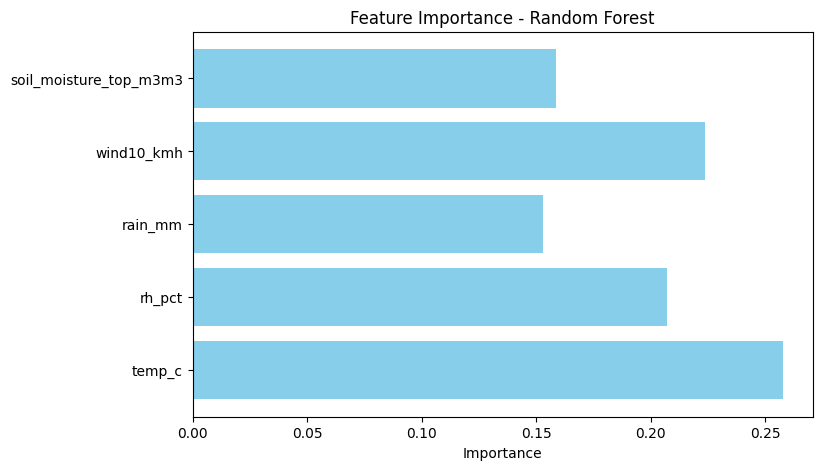

In [80]:

# Feature importances
importances = rf.feature_importances_
features = X.columns

import matplotlib.pyplot as plt
plt.figure(figsize=(8,5))
plt.barh(features, importances, color='skyblue')
plt.xlabel("Importance")
plt.title("Feature Importance - Random Forest")
plt.show()

A plot to show predictions align with the actual values

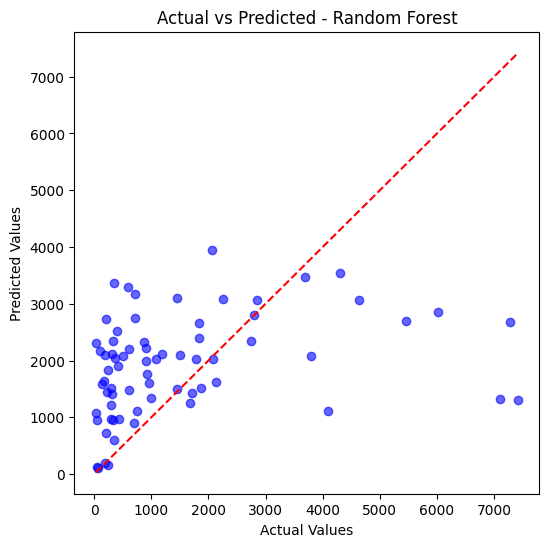

In [81]:
y_pred = rf.predict(X_test)

plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred, alpha=0.6, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # diagonal line
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted - Random Forest")
plt.show()


A plot to show how models perfom overtime

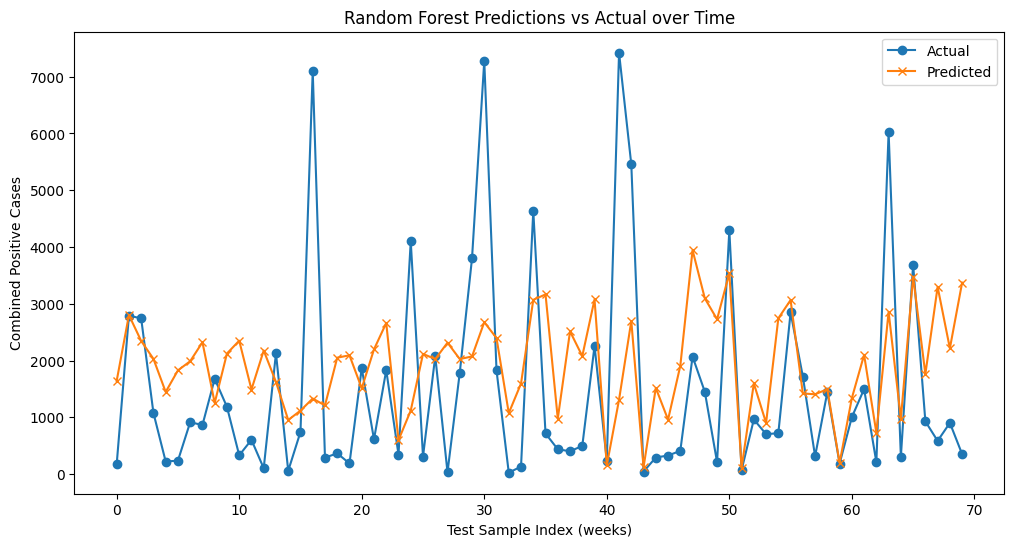

In [82]:
#its a time series of  predictions vs actual.
plt.figure(figsize=(12,6))
plt.plot(y_test.values, label="Actual", marker='o')
plt.plot(y_pred, label="Predicted", marker='x')
plt.legend()
plt.title("Random Forest Predictions vs Actual over Time")
plt.xlabel("Test Sample Index (weeks)")
plt.ylabel("Combined Positive Cases")
plt.show()


In [83]:

# Train/test split (80/20)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Define parameter grid (not too large to keep it fast)
param_dist = {
    'n_estimators': [100, 200, 300, 500],   # number of trees
    'max_depth': [None, 10, 20, 30],        # tree depth
    'min_samples_split': [2, 5, 10],        # min samples for split
    'min_samples_leaf': [1, 2, 4],          # min samples per leaf
    'max_features': ['sqrt', 'log2']        # feature selection
}

# Randomized Search
rf = RandomForestRegressor(random_state=42)
rf_random = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_dist,
    n_iter=15,        # number of random combinations
    cv=3,             # 3-fold cross-validation
    verbose=2,
    n_jobs=-1,
    random_state=42
)

# Fit the search
rf_random.fit(X_train, y_train)

# Best parameters
print("Best Parameters:", rf_random.best_params_)

# Best model
best_rf = rf_random.best_estimator_

# Predictions
y_pred = best_rf.predict(X_test)

# Evaluation
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"Tuned Random Forest RMSE: {rmse:.2f}")
print(f"Tuned Random Forest R²: {r2:.4f}")
# Accuracy in percentage (using R²)
accuracy_percent = r2 * 100
print(f"Model Accuracy: {accuracy_percent:.2f}%")


Fitting 3 folds for each of 15 candidates, totalling 45 fits
Best Parameters: {'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': 20}
Tuned Random Forest RMSE: 1757.51
Tuned Random Forest R²: 0.0636
Model Accuracy: 6.36%


                  Feature  Importance
0                  temp_c    0.238774
1                  rh_pct    0.228172
3              wind10_kmh    0.206183
4  soil_moisture_top_m3m3    0.171525
2                 rain_mm    0.155345


C:\Users\PC\AppData\Local\Temp\ipykernel_10424\1652632388.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Importance", y="Feature", data=feature_importance_df, palette="viridis")


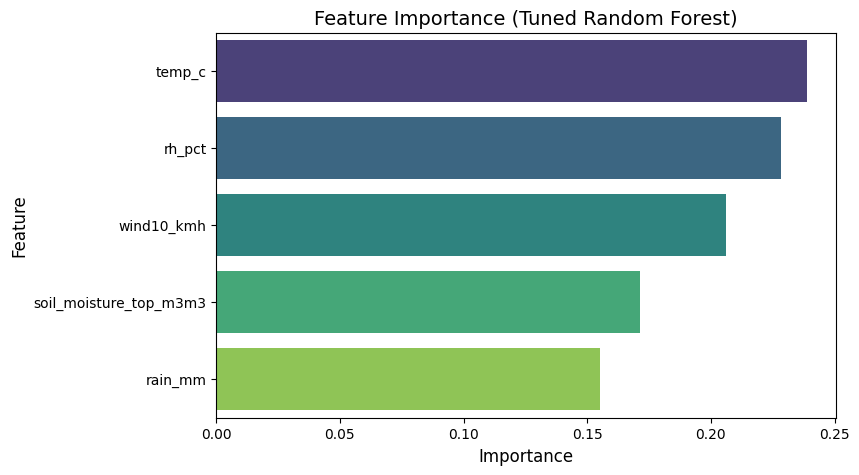

In [84]:
# Feature importances from the best model
importances = best_rf.feature_importances_
features = X.columns

# Put into DataFrame
feature_importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Print feature importance
print(feature_importance_df)

# Plot
plt.figure(figsize=(8,5))
sns.barplot(x="Importance", y="Feature", data=feature_importance_df, palette="viridis")
plt.title("Feature Importance (Tuned Random Forest)", fontsize=14)
plt.xlabel("Importance", fontsize=12)
plt.ylabel("Feature", fontsize=12)
plt.show()


feature importance ranking for preliminary Random Forest model:

| Rank | Feature                         | Importance |
| ---- | ------------------------------- | ---------- |
| 1️  | **Temperature (temp\_c)**       | 0.258      |
| 2️  | **Wind speed (wind10\_kmh)**    | 0.224      |
| 3️  | **Relative humidity (rh\_pct)** | 0.207      |
| 4️  | **Soil moisture**               | 0.159      |
| 5️  | **Rainfall (rain\_mm)**         | 0.153      |


#### To note:
- Temperature is the strongest driver in the model.

- Wind speed and humidity are also quite influential.

- Rainfall and soil moisture have lower (but still relevant) importance.

#### LAGS
- **Why did i decide to use lags?**

Many effects in the real world don’t happen instantly. For example:

| Cause              | Effect Happens After...                               |
| ------------------ | ----------------------------------------------------- |
| Rainfall today     | Mosquito breeding → malaria spike **2–3 weeks later** |
| Temperature drop   | Increased flu cases **next week**                     |
| Soil moisture drop | Crop stress **after some days**                       |


- Combining both lagged and current features

In [ ]:
# I did decide to copy the dataset to avoid overwriting
data_lagged = data.copy()

# Features to lag
climate_vars = ["temp_c", "rh_pct", "rain_mm", "wind10_kmh", "soil_moisture_top_m3m3"]

# Create lagged features (1, 2, 3 weeks)
for var in climate_vars:
    for lag in [1, 2, 3]:
        data_lagged[f"{var}_lag{lag}"] = data_lagged[var].shift(lag)

# Drop rows with NaNs caused by shifting
data_lagged = data_lagged.dropna().reset_index(drop=True)

data_lagged.head()


,periodname,week_start,week_end,Combined_positive,temp_c,rh_pct,rain_mm,wind10_kmh,soil_moisture_top_m3m3,temp_c_lag1,...,rh_pct_lag3,rain_mm_lag1,rain_mm_lag2,rain_mm_lag3,wind10_kmh_lag1,wind10_kmh_lag2,wind10_kmh_lag3,soil_moisture_top_m3m3_lag1,soil_moisture_top_m3m3_lag2,soil_moisture_top_m3m3_lag3
0,Week 4 2019-01-21 - 2019-01-27,2019-01-21,2019-01-27,70.0,31.342857,28.553571,0.0,19.123810,0.019250,30.727381,...,38.166667,0.0,0.0,0.0,15.034524,20.902381,20.397024,0.021024,0.025518,0.027899
1,Week 5 2019-01-28 - 2019-02-03,2019-01-28,2019-02-03,48.0,31.215476,28.142857,0.0,21.282738,0.021952,31.342857,...,24.785714,0.0,0.0,0.0,19.123810,15.034524,20.902381,0.019250,0.021024,0.025518
2,Week 6 2019-02-04 - 2019-02-10,2019-02-04,2019-02-10,44.0,31.786905,29.416667,0.0,25.648810,0.025649,31.215476,...,31.047619,0.0,0.0,0.0,21.282738,19.123810,15.034524,0.021952,0.019250,0.021024
3,Week 7 2019-02-11 - 2019-02-17,2019-02-11,2019-02-17,56.0,31.594643,32.577381,0.0,22.511310,0.022875,31.786905,...,28.553571,0.0,0.0,0.0,25.648810,21.282738,19.123810,0.025649,0.021952,0.019250
4,Week 8 2019-02-18 - 2019-02-24,2019-02-18,2019-02-24,78.0,31.289881,36.208333,1.6,15.057738,0.023363,31.594643,...,28.142857,0.0,0.0,0.0,22.511310,25.648810,21.282738,0.022875,0.025649,0.021952


In [ ]:
#Dropping rows with missing values from lagging
data_lagged = data_lagged.dropna().reset_index(drop=True)

In [95]:
#Definnig  features & target ====
target = "Combined_positive"
lagged_features = [col for col in data_lagged.columns 
                   if col not in ["periodname", "week_start", "week_end", target]]

X = data_lagged[lagged_features]
y = data_lagged[target]

In [96]:
# doing a train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [98]:
# Train Random Forest 
rf_lagged = RandomForestRegressor(n_estimators=100, random_state=42)
rf_lagged.fit(X_train, y_train)

,n_estimators,100
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [ ]:
# Predicting 
y_pred_lagged = rf_lagged.predict(X_test)

In [100]:
#Evaluation metrics
mse_lagged = mean_squared_error(y_test, y_pred_lagged)
rmse_lagged = np.sqrt(mse_lagged)
r2_lagged = r2_score(y_test, y_pred_lagged)
mae_lagged = mean_absolute_error(y_test, y_pred_lagged)

In [101]:
print("Random Forest with Lagged + Current Features")
print(f"RMSE: {rmse_lagged:.2f}")
print(f"R²: {r2_lagged:.4f}")
print(f"MAE: {mae_lagged:.2f}")

Random Forest with Lagged + Current Features
RMSE: 1806.59
R²: 0.2572
MAE: 1183.69


- Creating a plot to show features of  importance plot for the Random Forest model using current + lagged features:

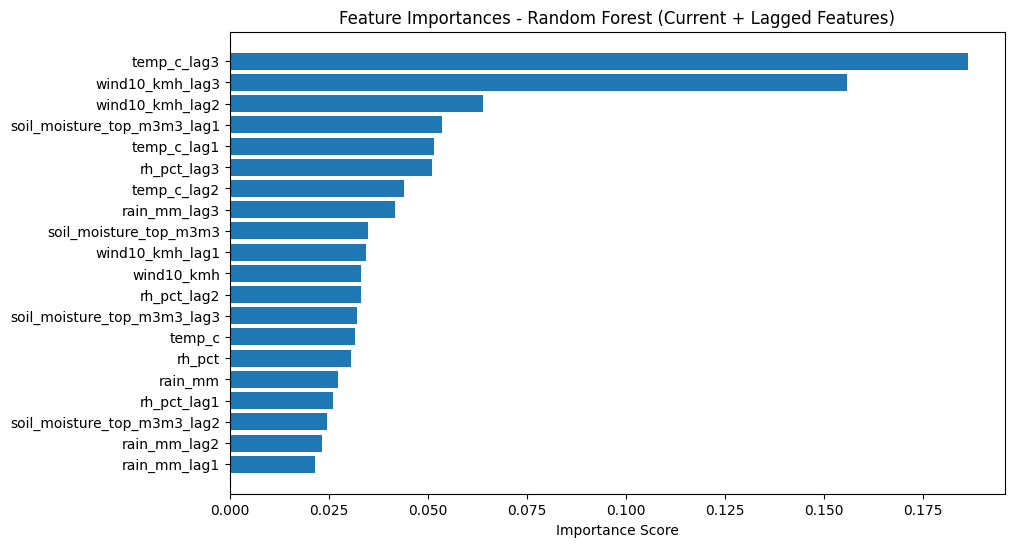

                        Feature  Importance
7                   temp_c_lag3    0.186334
16              wind10_kmh_lag3    0.155827
15              wind10_kmh_lag2    0.063955
17  soil_moisture_top_m3m3_lag1    0.053547
5                   temp_c_lag1    0.051625
10                  rh_pct_lag3    0.051123
6                   temp_c_lag2    0.043848
13                 rain_mm_lag3    0.041680
4        soil_moisture_top_m3m3    0.034862
14              wind10_kmh_lag1    0.034299


In [103]:
#Feature Importance
importances = rf_lagged.feature_importances_
features = X.columns

feat_importance = pd.DataFrame({
    "Feature": features,
    "Importance": importances
}).sort_values(by="Importance", ascending=False)

#creating the Plot 
plt.figure(figsize=(10,6))
plt.barh(feat_importance["Feature"], feat_importance["Importance"])
plt.gca().invert_yaxis()
plt.title("Feature Importances - Random Forest (Current + Lagged Features)")
plt.xlabel("Importance Score")
plt.show()

# Print top 10 for clarity
print(feat_importance.head(10))


- Comparing baseline vs Lagged model side by side

In [107]:
# Baseline metrics Without lags
baseline_results = {
    "Model": "Baseline RF (Current features)",
    "RMSE": 1796.20,   
    "R²": 0.0219,
    "MAE": 1322.70
}

# Lagged model metrics with lagged features
lagged_results = {
    "Model": "RF (Current + Lagged features)",
    "RMSE": rmse_lagged,
    "R²": r2_lagged,
    "MAE": mae_lagged
}

# A Combination into a comparison DataFrame
results_df = pd.DataFrame([baseline_results, lagged_results])

print("\nModel Performance Comparison")
print(results_df)



Model Performance Comparison
                            Model         RMSE        R²          MAE
0  Baseline RF (Current features)  1796.200000  0.021900  1322.700000
1  RF (Current + Lagged features)  1806.585205  0.257217  1183.689714


C:\Users\PC\AppData\Local\Temp\ipykernel_10424\4167151217.py:18: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(comparison["Model"], rotation=15)
C:\Users\PC\AppData\Local\Temp\ipykernel_10424\4167151217.py:18: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(comparison["Model"], rotation=15)
C:\Users\PC\AppData\Local\Temp\ipykernel_10424\4167151217.py:18: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(comparison["Model"], rotation=15)


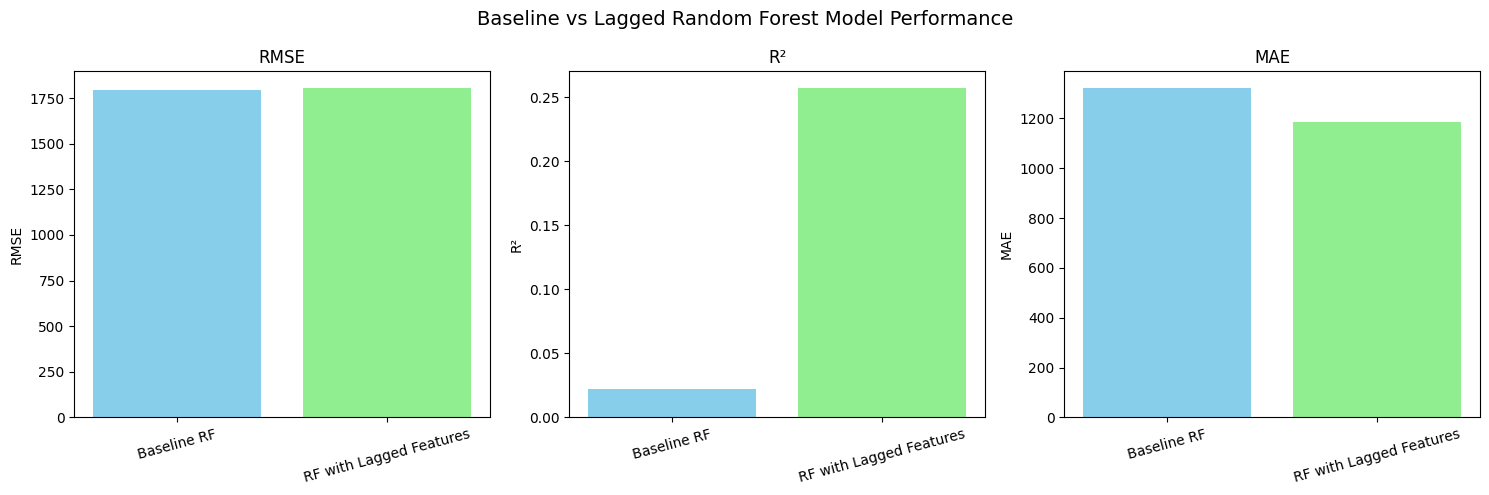

In [112]:
# Create a dataframe with both model results
comparison = pd.DataFrame({
    "Model": ["Baseline RF", "RF with Lagged Features"],
    "RMSE": [1796.20, rmse_lagged],
    "R²": [0.0219, r2_lagged],
    "MAE": [1322.70, mae_lagged]
})

#Plottng RMSE, R², MAE side by side
metrics = ["RMSE", "R²", "MAE"]

fig, axes = plt.subplots(1, 3, figsize=(15,5))

for i, metric in enumerate(metrics):
    axes[i].bar(comparison["Model"], comparison[metric], color=["skyblue", "lightgreen"])
    axes[i].set_title(metric)
    axes[i].set_ylabel(metric)
    axes[i].set_xticklabels(comparison["Model"], rotation=15)

plt.suptitle("Baseline vs Lagged Random Forest Model Performance", fontsize=14)
plt.tight_layout()
plt.show()
